<a href="https://colab.research.google.com/github/ChicagoDataScientist/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [47]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

column_headers = ['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']

df = pd.read_csv ('house-votes-84.data',
                  header=None,
                  names = column_headers,
                  na_values = "?")

df = df.replace ({'y': 1, 'n': 0})

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']


--2020-01-24 00:02:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-01-24 00:02:30 (129 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [48]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
from scipy.stats import sem, t
from scipy import mean
import scipy.stats as stats
import matplotlib.pyplot as plt


In [0]:
def confidence_interval(data, confidence_level=.95):
  # make sure that I'm working a numpy array
  # No matter how the data was passed into the function
  #sample = np.array(data)
  sample = data
  # sample mean
  x_bar = np.mean(sample)
  # **SAMPLE** standard deviation
  s = np.std(sample, ddof=1)
  # sample size
  n = len(sample)
  # t-statistic corresponding to DOF and Confidence Level
  # What is the t-statistic for this specific t-distribution that we're working with
  # The t-distribution that we're working with defined by the Degrees of Freedom
  # Return to me the t-statistic that contains the provided probability above the given cutoff
  t = stats.t.ppf((1+confidence_level) / 2, n-1)

  # print(s)
  print("Sample Size", n)
  # print(t)

  standard_error = s/np.sqrt(n)
  margin_of_error = t*standard_error

  upper_bound = x_bar + margin_of_error
  lower_bound = x_bar - margin_of_error

  return (lower_bound, x_bar, upper_bound)

In [51]:
# Confidence Interval
el_salvador_aid_CI = confidence_interval(rep['el-salvador-aid'])

el_salvador_aid_CI

Sample Size 168


(0.9186993482424444, 0.9515151515151515, 0.9843309547878587)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


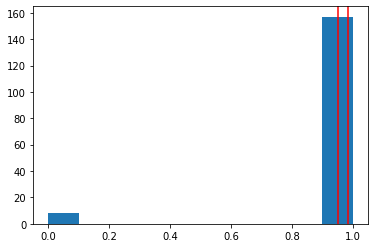

In [52]:
repaid = rep['el-salvador-aid']
import seaborn as sns
CI = el_salvador_aid_CI
#sns.distplot(repaid)
plt.hist(repaid)
CI = el_salvador_aid_CI
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
#plt.axvline(x=CI[0], color='k');

In [0]:
# If we were to run another sample, there is a 95% chance the sample mean will be between 92 and 98

In [0]:
# Chi square

# **I want to do a chi^2 test for sex and education-num**

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

In [3]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [4]:
df['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [0]:
df['education-num'] = df['education-num'].astype(float)

In [6]:
df['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [7]:
df['education-num'].head()

0    13.0
1    13.0
2     9.0
3     7.0
4    13.0
Name: education-num, dtype: float64

In [8]:
df['education-num'].value_counts()

9.0     10501
10.0     7291
13.0     5355
14.0     1723
11.0     1382
7.0      1175
12.0     1067
6.0       933
4.0       646
15.0      576
5.0       514
8.0       433
16.0      413
3.0       333
2.0       168
1.0        51
Name: education-num, dtype: int64

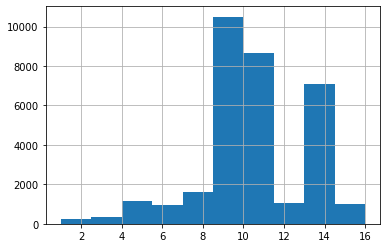

In [9]:
df['education-num'].hist()

In [10]:
pd.crosstab(df['education-num'], df['sex'])

sex,Female,Male
education-num,,
1.0,16,35
2.0,46,122
3.0,84,249
4.0,160,486
5.0,144,370
6.0,295,638
7.0,432,743
8.0,144,289
9.0,3390,7111


In [11]:
# Bin the education-num so it has fewer categories

cut_points = [0, 7, 11, 12, 15, 100]
bin_names = ['> 7 years', '8-10 years', '12 years', '13-15 years', '16+ years']

df['edu_completed'] = pd.cut (df['education-num'], cut_points, labels = bin_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,edu_completed
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,13-15 years
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,13-15 years
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8-10 years
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,> 7 years
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,13-15 years


In [12]:
df['edu_completed'].describe()

count          32561
unique             5
top       8-10 years
freq           19607
Name: edu_completed, dtype: object

In [13]:
contingency_table = pd.crosstab(df['sex'], df['edu_completed'])

contingency_table

edu_completed,> 7 years,8-10 years,12 years,13-15 years,16+ years
sex,,,,,
Female,1177,6840,421,2247,86
Male,2643,12767,646,5407,327


In [14]:
from scipy import stats
chi2, p_value, dof, expected_value_table = stats.chi2_contingency(contingency_table)

print("Chi^2 Statistic:", chi2)
print("P value", p_value)
print("Degrees of Freedom", dof)
print("Explected Value Table: \n", expected_value_table)

Chi^2 Statistic: 133.29703445203788
P value 7.676708034122912e-28
Degrees of Freedom 4
Explected Value Table: 
 [[ 1263.63502349  6485.88793342   352.95774086  2531.90117011
    136.61813212]
 [ 2556.36497651 13121.11206658   714.04225914  5122.09882989
    276.38186788]]


# **Based on a Chi^2 statistic of 133 and a p-value of ~0, I reject the null hypothesis that sex and edu_completed are independent and suggest the alternative, that they are associated.**

**Calculate our Chi^2 statistic using NumPy**

In [15]:
contingency_table

edu_completed,> 7 years,8-10 years,12 years,13-15 years,16+ years
sex,,,,,
Female,1177,6840,421,2247,86
Male,2643,12767,646,5407,327


In [16]:
contingency_table_with_margins = pd.crosstab(df['sex'], df['edu_completed'], margins=True)

contingency_table_with_margins

edu_completed,> 7 years,8-10 years,12 years,13-15 years,16+ years,All
sex,,,,,,
Female,1177,6840,421,2247,86,10771
Male,2643,12767,646,5407,327,21790
All,3820,19607,1067,7654,413,32561


In [17]:
# What proportion of people would we expect to have >7 years education?
3820 / 32561

0.11731826418107552

In [18]:
# What proportion of people would we expect to be female?
10771 / 32561

0.33079450876815825

In [19]:
(3820 / 32561)*(10771 / 32561)

0.03880823756931189

In [20]:
(3820 / 32561)*(10771 / 32561) * 32561

1263.6350234943645

In [21]:
# The expepcted value for cell: (row 1, column 1)
(3820)*(10771)/32561

1263.6350234943645

In [22]:
# Grab the crosstab cells that correspond to the females
femalecount = contingency_table.iloc[0][0:5].values
femalecount

array([1177, 6840,  421, 2247,   86])

In [23]:
# Grab the crosstab cells that correspond to the males
malecount = contingency_table.iloc[1][0:5].values
malecount

array([ 2643, 12767,   646,  5407,   327])

In [24]:
# Calculate row and column totals to use in the expected value calculations
row_sums = contingency_table_with_margins.iloc[0:2, 5].values
col_sums = contingency_table_with_margins.iloc[2, 0:5].values

total = contingency_table_with_margins.loc['All','All']

print(row_sums)
print(col_sums)
print(total)

[10771 21790]
[ 3820 19607  1067  7654   413]
32561


In [25]:
# Calculate table of expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

expected

array([[ 1263.63502349,  6485.88793342,   352.95774086,  2531.90117011,
          136.61813212],
       [ 2556.36497651, 13121.11206658,   714.04225914,  5122.09882989,
          276.38186788]])

In [26]:
# Calculating the chi^2 Statistic

observed = contingency_table
observed

edu_completed,> 7 years,8-10 years,12 years,13-15 years,16+ years
sex,,,,,
Female,1177,6840,421,2247,86
Male,2643,12767,646,5407,327


In [28]:
# Row 1 Column 4 of both tables
# Do this calculation with all of the cells of the table
# And then add them all up
(2247	 - 2531.901)**2 / 2531.901

32.058354493718326

In [29]:
chi_squared = (((observed - expected)**2)/expected).sum().sum()

chi_squared

133.2970344520379

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)